## Theory & Practical Questions

## Question 1: What is Simple Linear Regression?
Answer:
* Simple Linear Regression is a statistical technique used in Machine Learning to study the relationship between two variables, one independent variable (predictor) and one dependent variable (target). It assumes that the relationship between these variables can be represented by a straight line. The general equation of simple linear regression is: Y=b0​+b1​X

* where Y is the predicted value, X is the input variable, b0 is the intercept (value of Y when X = 0), and b1 is the slope (change in Y for every unit change in X).
* For example predicting a price of the house based on its size. Here size is an independent variable and price is a dependent variable.


## Question 2: What are the key assumptions of Simple Linear Regression?
Answer:
* Simple Linear Regression works effectively only when certain assumptions about the data are satisfied. The key assumptions are:
  1. Linearity – The relationship between the independent variable (X) and the dependent variable (Y) should be linear, meaning Y changes at a constant rate with X.
  2. Independence of Errors – The residuals (errors) should be independent of each other; one observation should not influence another.
  3. Homoscedasticity – The variance of the residuals should remain constant across all levels of X; there should be no pattern in error distribution.
  4. Normality of Errors – The residuals should be normally distributed to make accurate predictions and valid hypothesis testing.
  5. No or Minimal Multicollinearity – Although simple regression uses only one predictor, in practice, the independent variable should not be strongly correlated with other unobserved variables.
*  These assumptions ensure that the regression model gives reliable and unbiased predictions. If these assumptions are violated, the accuracy and interpretability of the model can be affected.


## Question 3: What is heteroscedasticity, and why is it important to address in regression models?
Answer:
* Heteroscedasticity refers to a condition in regression models where the variance of the residuals (errors) is not constant across all levels of the independent variable. In simple terms, the spread of errors increases or decreases as the value of the predictor changes. Ideally, regression assumes homoscedasticity, meaning the residuals have constant variance.

* Addressing heteroscedasticity is important because it can lead to inefficient
estimates and biased statistical tests. When heteroscedasticity is present, the standard errors of coefficients become unreliable, which affects hypothesis testing and confidence intervals, making predictions less trustworthy. Techniques such as transforming variables, using weighted least squares, or robust standard errors are often applied to handle this issue and ensure accurate and reliable regression results.


## Question 4: What is Multiple Linear Regression?
Answer:
* Multiple Linear Regression (MLR) is an extension of Simple Linear Regression used to model the relationship between one dependent variable (target) and two or more independent variables (predictors). Unlike simple regression, which uses only one predictor, MLR allows us to analyze how multiple factors together influence the target variable.

* The general equation of Multiple Linear Regression is:

  * Y=b0​+b1​X1​+b2​X2​+...+bn​Xn​

* where Y is the predicted value, b0 is the intercept, b1, b2... bn are coefficients representing the impact of each independent variable (X1, X2... Xn) on Y.
* For example, predicting a house price (Y) based on its size, location, and number of rooms uses multiple linear regression. It is widely used for prediction, trend analysis, and understanding how several variables together influence an outcome. However, assumptions such as linearity, independence, homoscedasticity, and absence of multicollinearity must be satisfied for reliable results.

## Question 5: What is polynomial regression, and how does it differ from linear regression?
Answer:
* Polynomial Regression is a type of regression technique used when the relationship between the independent variable (X) and the dependent variable (Y) is non-linear but can be modeled as an nth-degree polynomial. Instead of fitting a straight line like in linear regression, polynomial regression fits a curved line to capture more complex relationships.

* The general form of a polynomial regression equation is:
  * Y=b0​+b1​X+b2​X2+b3​X3+...+bn​X to the power n

* where higher-order terms (X to the power 2, X to the power 3…) allow the model to fit curves.

* Difference from Linear Regression:
  * Linear Regression assumes a straight-line relationship between X and Y.
  * Polynomial Regression can model curves and bends by introducing polynomial terms of the independent variable.

* For example, predicting the growth of a plant over time, where the rate of growth increases and then decreases, would be better captured by polynomial regression rather than a simple straight-line model.


## Question 6:  Implement a Python program to fit a Simple Linear Regression model to
* The following sample data:
  * X = [1, 2, 3, 4, 5]
  * Y = [2.1, 4.3, 6.1, 7.9, 10.2]
* Plot the regression line over the data points.
* (Include your Python code and output in the code box below.)

Intercept (b0): 0.17999999999999794
Slope (b1): 1.9800000000000004


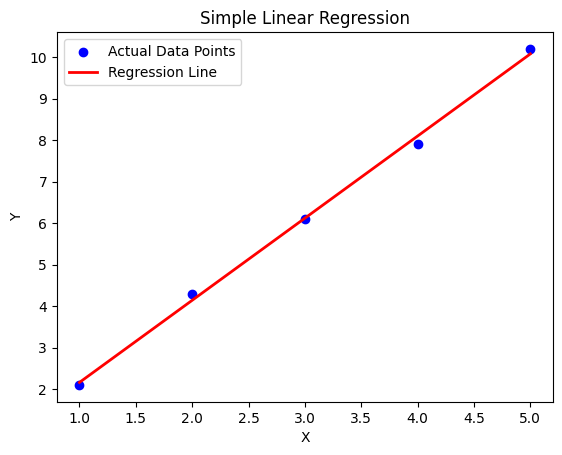

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn (2D array)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)


Y_pred = model.predict(X)


print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")


plt.scatter(X, Y, color='blue', label="Actual Data Points")
plt.plot(X, Y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


## Question 7: Fit a Multiple Linear Regression model on this sample data:
* Area = [1200, 1500, 1800, 2000]
* Rooms = [2, 3, 3, 4]
* Price = [250000, 300000, 320000, 370000]
* Check for multicollinearity using VIF and report the results.
* (Include your Python code and output in the code box below.)

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

# Converting data into a DataFrame
data = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

# Independent (X) and dependent (Y) variables
X = data[['Area', 'Rooms']]
Y = data['Price']

model = LinearRegression()
model.fit(X, Y)

print("Intercept (b0):", model.intercept_)
print("Coefficients (b1 for Area, b2 for Rooms):", model.coef_)

X_const = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nVIF Values:")
print(vif)


Intercept (b0): 103157.89473684214
Coefficients (b1 for Area, b2 for Rooms): [   63.15789474 34736.84210526]

VIF Values:
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


## Question 8:  Implement polynomial regression on the following data:
* X = [1, 2, 3, 4, 5]
* Y = [2.2, 4.8, 7.5, 11.2, 14.7]
* Fit a 2nd-degree polynomial and plot the resulting curve.
* (Include your Python code and output in the code box below.)

Intercept (b0): 0.06000000000000938
Coefficients (b1, b2): [0.   1.94 0.2 ]


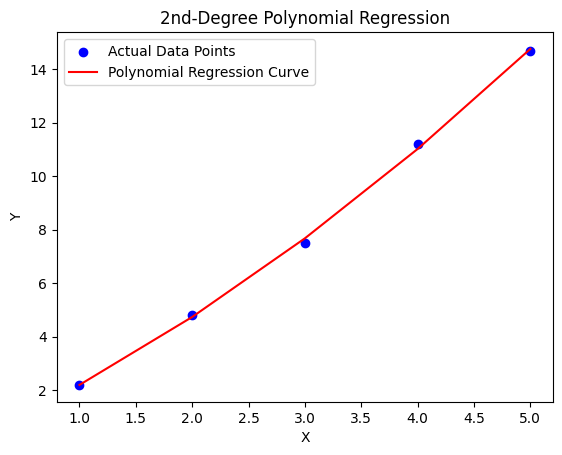

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

# Predicting Y values
Y_pred = model.predict(X_poly)

# Printing coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1, b2):", model.coef_)

plt.scatter(X, Y, color='blue', label="Actual Data Points")
plt.plot(X, Y_pred, color='red', label="Polynomial Regression Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd-Degree Polynomial Regression")
plt.legend()
plt.show()


## Question 9: Create a residuals plot for a regression model trained on this data:
* X = [10, 20, 30, 40, 50]
* Y = [15, 35, 40, 50, 65]
* Assess heteroscedasticity by examining the spread of residuals.
* (Include your Python code and output in the code box below.)

Residuals: [-3.   5.5 -1.  -2.5  1. ]


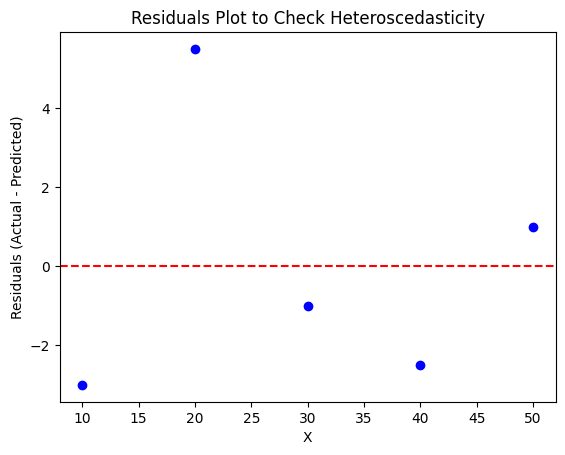

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

print("Residuals:", residuals)

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot to Check Heteroscedasticity")
plt.show()


## Question 10: Imagine you are a data scientist working for a real estate company.
* You need to predict house prices using features like area, number of rooms, and location.
* However, you detect heteroscedasticity and multicollinearity in your regression model.
* Explain the steps you would take to address these issues and ensure a robust
model.

# Answer:
* As a data scientist predicting house prices using features like area, number of rooms, and location, detecting heteroscedasticity and multicollinearity indicates that the regression model may produce unreliable and biased predictions. here are the steps I would take to address these issues and ensure a robust model:

1. Addressing Heteroscedasticity
* Heteroscedasticity means the variance of residuals is not constant across all predicted values. To handle this:

  * a. Transforming Variables – Apply transformations such as log(Y), square root(Y), or Box-Cox transformation on the dependent variable to stabilize variance.

  * b. Using Weighted Least Squares (WLS) – Assign weights to observations inversely proportional to their variance so that points with high variance have less influence on the model.

  * c. Robust Regression – Use regression models with heteroscedasticity-consistent standard errors (e.g., statsmodels robust standard errors).

  * d. Feature Engineering – Check if missing key variables cause heteroscedasticity and include them if needed.

2. Addressing Multicollinearity
* Multicollinearity occurs when independent variables (e.g., area and number of rooms) are highly correlated, making coefficient estimates unstable. Steps to reduce it:

 * a. Check VIF (Variance Inflation Factor) – Identify variables with VIF > 10 as problematic.

 * b. Remove or Combine Features – Drop highly correlated features or combine them (e.g., combine "area" and "number of rooms" into "area per room").

 * c. Feature Selection – Use statistical tests or regularization to keep only the most significant predictors.

 * d. Apply Regularization Techniques – Ridge Regression or Lasso Regression can help reduce the impact of multicollinearity by penalizing large coefficients.

3. Ensuring Robust Model
* Split Data into training and testing sets to validate model performance.

* Standardize or Normalize features to improve model stability.

* Evaluate Model using performance metrics like RMSE and check residual plots after adjustments to confirm improvements.

* By transforming variables to reduce heteroscedasticity and applying techniques like feature selection or regularization to handle multicollinearity, the regression model becomes more reliable, interpretable, and accurate for predicting house prices.

